In [1]:
import pandas as pd


df = pd.read_csv("train.csv", sep='\t')

questions = df['question']
queries = df['query']

In [2]:
df2=pd.read_csv('turkish_query_answ_sql.csv')
sorgular = df2['Query']
girdiler= df2['Input']

butun_sorgular = pd.concat([sorgular, queries], ignore_index=True)
butun_girdiler=pd.concat([girdiler, questions], ignore_index=True)

In [3]:
df3 = pd.read_excel("train_finetune.xlsx")
girdiler2 = df3['question']
sorgular2 = df3['query']

butun_sorgular2 = pd.concat([sorgular2, butun_sorgular], ignore_index=True)
butun_girdiler2 = pd.concat([girdiler2, butun_girdiler], ignore_index=True)

In [4]:
df_birlesik = pd.DataFrame({
    'Input': pd.concat([butun_girdiler, butun_girdiler2], ignore_index=True),
    'Query': pd.concat([butun_sorgular, butun_sorgular2], ignore_index=True)
})
#df_birlesik.to_csv("birlesik_veri.csv", index=False)
df_birlesik.tail()

,Input,Query
28578,körfez bölgesinde nerede restoran bulabilirim?,"SELECT t2.ev_numarası , t1.isim FROM konum AS ..."
28579,Bana Körfez Bölgesi'den iyi bir restoran ver.,"SELECT t2.ev_numarası , t1.isim FROM konum AS ..."
28580,Körfez Bölgesi'ndeki iyi restoranlar hangileri...,"SELECT t2.ev_numarası , t1.isim FROM konum AS ..."
28581,Bana körfez bölgesinde birkaç iyi restoran ver...,"SELECT t2.ev_numarası , t1.isim FROM konum AS ..."
28582,Körfez Bölgesi'nde iyi bir restoran nedir?,"SELECT t2.ev_numarası , t1.isim FROM konum AS ..."


In [5]:
df_birlesik.sample(10)

,Input,Query
7353,Amerikan futbolu veya lakros oynayan bütün öğr...,"SELECT T2.Soyad , T2.Ad FROM SporBilgileri AS ..."
905,hasta kabul tablosundan son 1 saatte gelen has...,SELECT * FROM patient_admission WHERE Entry_da...
10647,Hesabı olmayan müşterilerin isimlerini ve soyi...,"SELECT müşteri_adı , müşteri_soyadı FROM Müşte..."
19546,dersler tablosunda hangi ders 5 kredilidir,SELECT * FROM lessons WHERE credit=5
1014,oyuncular reytingi tablosundaki en çok gol ata...,SELECT * FROM PlayersRating ORDER BY GoalRatin...
17714,subhasis chaudhuri konferans makaleleri,SELECT DISTINCT t3.makaleNo FROM yazılanlar AS...
6085,Ürün türüne göre gruplanmmış ve sıralanmış ola...,"SELECT max(ürün_fiyatı) , min(ürün_fiyatı) , ü..."
526,randevular tablosundan Aslan ahmet adlı doktor...,SELECT * FROM appointments INNER JOIN patients...
7555,Yapım yılı ve sınıfı sırasında bütün gemi isim...,"SELECT İsim FROM Gemi ORDER BY Yapım_Yılı , Sınıf"
2991,Sergileri ortalama 200'ün üzerinde izleyiciyle...,SELECT T3.İsim FROM sergi_kaydı AS T1 JOIN ser...


In [6]:
import re

def temizle_input(text):
    text = str(text)
    text = text.strip()  
    text = re.sub(r'\s+', ' ', text)  #
    text = text.lower()  
    return text

df_birlesik['Input'] = df_birlesik['Input'].apply(temizle_input)

In [7]:
import re

def lowercase_sql(sql):
    sql = sql.lower()
    sql = re.sub(r'\b(select|from|where|group by|order by|inner join|left join|right join|union|like|in|as|distinct|insert|update|delete)\b', lambda x: x.group(0).upper(), sql)
    return sql

def temizle_bosluk(sql):
    sql = re.sub(r'\s+', ' ', sql)
    sql = sql.strip()
    return sql

def bosluk_ekle(sql):
    sql = re.sub(r"([=><!(),*])", r" \1 ", sql)
    sql = re.sub(r'\s+', ' ', sql)
    return sql.strip()

def sabitleri_degistir(sql):
    sql = re.sub(r"'[^']*'", "<value>", sql)  
    sql = re.sub(r"\b\d+(\.\d+)?\b", "<value>", sql)  
    return sql

def temizle_sql_pipeline(sql):
    sql = str(sql)
    sql = lowercase_sql(sql)
    sql = temizle_bosluk(sql)
    sql = bosluk_ekle(sql)
    sql = sabitleri_degistir(sql)
    return sql

df_birlesik['Query'] = df_birlesik['Query'].apply(temizle_sql_pipeline)
df_birlesik['Query'].sample(10)

22890    SELECT t1.başlık , t1.film_no FROM film AS t1 ...
5478     SELECT depolanma_tarihi FROM tüm_dokümanlar WH...
7905                   SELECT DISTINCT konum FROM istasyon
4682     SELECT isim FROM oyuncu WHERE puanlar > ( SELE...
13582    SELECT t1.sanatçı_ismi FROM sanatçı AS t1 join...
12329    SELECT kampüs FROM kampüsler WHERE "i̇dari böl...
212           SELECT * FROM lessons WHERE credit > <value>
13087    SELECT t1.satır_1 FROM adresler AS t1 join öğr...
22850    SELECT isim FROM aktör GROUP BY isim ORDER BY ...
6943     SELECT t2.isim , t1.yer FROM demiryolu AS t1 j...
Name: Query, dtype: object

In [8]:
df_birlesik.sample(10)

,Input,Query
22545,farklı dekora sahip odaların ortalama ve minim...,"SELECT dekor , avg ( taban_fiyat ) , min ( tab..."
17035,abd'deki en uzun nehrin uzunluğu ne kadardır?,SELECT uzunluk FROM nehir WHERE uzunluk = ( SE...
10595,jazz veya rock türüne ait parçaların isimlerin...,SELECT t2.isim FROM türler AS t1 join parçalar...
26430,atanmayan projelerin isimleri nelerdir?,SELECT i̇sim FROM projeler WHERE kod not IN ( ...
15703,her yurtta 20 yaş üstü kaç öğrenci bulunmaktadır?,"SELECT count ( * ) , t3.yurt_ismi FROM öğrenci..."
19073,bölümler tablosundan ingilizce bölümündeki kız...,"SELECT programs.programcode , programs.name , ..."
3320,bütün konumları ve her konumdaki benzin istasy...,"SELECT konum , count ( * ) FROM benzin_istasyo..."
25410,güz seçim turunda kaç erkek (cinsiyet m) öğren...,SELECT count ( * ) FROM öğrenci AS t1 join oyl...
28569,mountain view'da araplar için iyi yerler hangi...,"SELECT t2.ev_numarası , t1.isim FROM restoran ..."
23907,"1000 dolardan fazlaya mal olan, doktor john we...",SELECT isim FROM prosedürler WHERE maliyet > <...


In [9]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Bidirectional, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

inputs = df_birlesik['Input'].astype(str).values
targets = ['<start> ' + q + ' <end>' for q in df_birlesik['Query'].astype(str).values]

# Tokenizer
input_tokenizer = Tokenizer(filters='', lower=True, oov_token='<OOV>')
input_tokenizer.fit_on_texts(inputs)
input_sequences = input_tokenizer.texts_to_sequences(inputs)

target_tokenizer = Tokenizer(filters='', lower=True, oov_token='<OOV>')
target_tokenizer.fit_on_texts(targets)
target_sequences = target_tokenizer.texts_to_sequences(targets)

# Maksimum dizin uzunlukları
max_encoder_len = max(len(seq) for seq in input_sequences)
max_decoder_len = max(len(seq) for seq in target_sequences)

# Padding
encoder_input_data = pad_sequences(input_sequences, maxlen=max_encoder_len, padding='post')
decoder_input_data = pad_sequences(target_sequences, maxlen=max_decoder_len, padding='post')

decoder_target_data = pad_sequences([seq[1:] + [0] for seq in target_sequences], maxlen=max_decoder_len, padding='post')
decoder_target_data = decoder_target_data.reshape(*decoder_target_data.shape, 1)

In [10]:
latent_dim = 256
dropout_rate = 0.2
recurrent_dropout = 0.1

vocab_size_encoder = len(input_tokenizer.word_index) + 1
vocab_size_decoder = len(target_tokenizer.word_index) + 1

# ENCODER
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(vocab_size_encoder, latent_dim, mask_zero=True)(encoder_inputs)
enc_emb = Dropout(dropout_rate)(enc_emb)

bilstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(
    LSTM(latent_dim, return_state=True, dropout=dropout_rate, recurrent_dropout=recurrent_dropout)
)(enc_emb)

state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
encoder_states = [state_h, state_c]

# DECODER
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(vocab_size_decoder, latent_dim * 2, mask_zero=True)
dec_emb = dec_emb_layer(decoder_inputs)
dec_emb = Dropout(dropout_rate)(dec_emb)

decoder_lstm = LSTM(
    latent_dim * 2, 
    return_sequences=True, 
    return_state=True,
    dropout=dropout_rate,
    recurrent_dropout=recurrent_dropout,
    kernel_regularizer=regularizers.l2(0.001)
)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_outputs = Dropout(dropout_rate)(decoder_outputs)
decoder_dense = Dense(vocab_size_decoder, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# MODEL
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, None, 256) │  2,414,848 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, None, 256) │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None)      │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, None, 512) │  2,803,712 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ [(None, 512),     │  1,050,624 │ dropout[0][0],    │
│ (Bidirectional)     │ (None, 256),      │            │ not_equal[0][0]   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, None, 512) │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 512)       │          0 │ bidirectional[0]… │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 512)       │          0 │ bidirectional[0]… │
│ (Concatenate)       │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, None,     │  2,099,200 │ dropout_1[0][0],  │
│                     │ 512), (None,      │            │ concatenate[0][0… │
│                     │ 512), (None,      │            │ concatenate_1[0]… │
│                     │ 512)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, None, 512) │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, None,      │  2,809,188 │ dropout_2[0][0]   │
│                     │ 5476)             │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 11,177,572 (42.64 MB)

 Trainable params: 11,177,572 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
X_train, X_val, decoder_input_train, decoder_input_val, decoder_target_train, decoder_target_val = train_test_split(
    encoder_input_data, decoder_input_data, decoder_target_data,
    test_size=0.2, random_state=42
)

In [ ]:
checkpoint = ModelCheckpoint('nl2sql_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    [X_train, decoder_input_train],
    decoder_target_train, 
    batch_size=64,
    epochs=50,
    validation_data=([X_val, decoder_input_val], decoder_target_val),
    callbacks=[checkpoint, early_stopping]
)

model.save("nl2sql_seq2seq_model.keras")

def save_tokenizers(input_tokenizer, target_tokenizer, path_prefix="tokenizer"):
    with open(f"{path_prefix}_input.pkl", "wb") as f:
        pickle.dump(input_tokenizer, f)
    with open(f"{path_prefix}_target.pkl", "wb") as f:
        pickle.dump(target_tokenizer, f)

save_tokenizers(input_tokenizer, target_tokenizer)

# ENCODER MODEL
encoder_model = Model(encoder_inputs, encoder_states)

# DECODER MODEL
decoder_state_input_h = Input(shape=(latent_dim * 2,))
decoder_state_input_c = Input(shape=(latent_dim * 2,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2 = dec_emb_layer(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)

decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs2] + decoder_states2)

encoder_model.save("encoder_model.keras")
decoder_model.save("decoder_model.keras")

Epoch 1/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1315 - loss: 4.7604
Epoch 1: val_accuracy improved from -inf to 0.14396, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.1315 - loss: 4.7570 - val_accuracy: 0.1440 - val_loss: 2.2958
Epoch 2/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 950ms/step - accuracy: 0.1485 - loss: 2.1490
Epoch 2: val_accuracy improved from 0.14396 to 0.16041, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.1485 - loss: 2.1486 - val_accuracy: 0.1604 - val_loss: 1.7996
Epoch 3/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.1621 - loss: 1.7229
Epoch 3: val_accuracy improved from 0.16041 to 0.17135, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 356s 994ms/step - accuracy: 0.1621 - loss: 1.7227 - val_accuracy: 0.1714 - val_loss: 1.4961
Epoch 4/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 926ms/step - accuracy: 0.1717 - loss: 1.4185
Epoch 4: val_accuracy improved from 0.17135 to 0.18131, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 352s 982ms/step - accuracy: 0.1717 - loss: 1.4183 - val_accuracy: 0.1813 - val_loss: 1.2104
Epoch 5/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1823 - loss: 1.1365
Epoch 5: val_accuracy improved from 0.18131 to 0.19166, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 421s 1s/step - accuracy: 0.1823 - loss: 1.1363 - val_accuracy: 0.1917 - val_loss: 0.9515
Epoch 6/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1923 - loss: 0.8866
Epoch 6: val_accuracy improved from 0.19166 to 0.20088, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.1923 - loss: 0.8865 - val_accuracy: 0.2009 - val_loss: 0.7382
Epoch 7/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2021 - loss: 0.6911
Epoch 7: val_accuracy improved from 0.20088 to 0.20997, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.2021 - loss: 0.6910 - val_accuracy: 0.2100 - val_loss: 0.5714
Epoch 8/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2098 - loss: 0.5369
Epoch 8: val_accuracy improved from 0.20997 to 0.21654, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.2099 - loss: 0.5369 - val_accuracy: 0.2165 - val_loss: 0.4460
Epoch 9/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2171 - loss: 0.4314
Epoch 9: val_accuracy improved from 0.21654 to 0.22174, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - accuracy: 0.2171 - loss: 0.4314 - val_accuracy: 0.2217 - val_loss: 0.3627
Epoch 10/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2226 - loss: 0.3493
Epoch 10: val_accuracy improved from 0.22174 to 0.22575, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 435s 1s/step - accuracy: 0.2226 - loss: 0.3493 - val_accuracy: 0.2257 - val_loss: 0.2966
Epoch 11/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 965ms/step - accuracy: 0.2264 - loss: 0.2928
Epoch 11: val_accuracy improved from 0.22575 to 0.22830, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.2264 - loss: 0.2927 - val_accuracy: 0.2283 - val_loss: 0.2514
Epoch 12/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 946ms/step - accuracy: 0.2274 - loss: 0.2497
Epoch 12: val_accuracy improved from 0.22830 to 0.23047, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 360s 1s/step - accuracy: 0.2274 - loss: 0.2497 - val_accuracy: 0.2305 - val_loss: 0.2146
Epoch 13/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2301 - loss: 0.2140
Epoch 13: val_accuracy improved from 0.23047 to 0.23209, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.2301 - loss: 0.2140 - val_accuracy: 0.2321 - val_loss: 0.1873
Epoch 14/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - accuracy: 0.2327 - loss: 0.1909
Epoch 14: val_accuracy improved from 0.23209 to 0.23337, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.2327 - loss: 0.1908 - val_accuracy: 0.2334 - val_loss: 0.1644
Epoch 15/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2327 - loss: 0.1668
Epoch 15: val_accuracy improved from 0.23337 to 0.23457, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 414s 1s/step - accuracy: 0.2327 - loss: 0.1668 - val_accuracy: 0.2346 - val_loss: 0.1461
Epoch 16/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 998ms/step - accuracy: 0.2350 - loss: 0.1475 
Epoch 16: val_accuracy improved from 0.23457 to 0.23546, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.2350 - loss: 0.1475 - val_accuracy: 0.2355 - val_loss: 0.1325
Epoch 17/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 943ms/step - accuracy: 0.2360 - loss: 0.1336
Epoch 17: val_accuracy improved from 0.23546 to 0.23609, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 357s 997ms/step - accuracy: 0.2360 - loss: 0.1336 - val_accuracy: 0.2361 - val_loss: 0.1213
Epoch 18/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 956ms/step - accuracy: 0.2342 - loss: 0.1220
Epoch 18: val_accuracy improved from 0.23609 to 0.23675, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.2342 - loss: 0.1220 - val_accuracy: 0.2367 - val_loss: 0.1102
Epoch 19/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2371 - loss: 0.1097
Epoch 19: val_accuracy improved from 0.23675 to 0.23707, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 418s 1s/step - accuracy: 0.2371 - loss: 0.1097 - val_accuracy: 0.2371 - val_loss: 0.1032
Epoch 20/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2390 - loss: 0.1013
Epoch 20: val_accuracy improved from 0.23707 to 0.23761, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 414s 1s/step - accuracy: 0.2390 - loss: 0.1013 - val_accuracy: 0.2376 - val_loss: 0.0954
Epoch 21/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2386 - loss: 0.0949
Epoch 21: val_accuracy improved from 0.23761 to 0.23828, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 411s 1s/step - accuracy: 0.2386 - loss: 0.0949 - val_accuracy: 0.2383 - val_loss: 0.0881
Epoch 22/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2391 - loss: 0.0887
Epoch 22: val_accuracy improved from 0.23828 to 0.23849, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 411s 1s/step - accuracy: 0.2391 - loss: 0.0887 - val_accuracy: 0.2385 - val_loss: 0.0853
Epoch 23/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2419 - loss: 0.0803
Epoch 23: val_accuracy did not improve from 0.23849
358/358 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.2419 - loss: 0.0803 - val_accuracy: 0.2384 - val_loss: 0.0827
Epoch 24/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2404 - loss: 0.0762
Epoch 24: val_accuracy improved from 0.23849 to 0.23875, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 406s 1s/step - accuracy: 0.2404 - loss: 0.0762 - val_accuracy: 0.2387 - val_loss: 0.0784
Epoch 25/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 898ms/step - accuracy: 0.2380 - loss: 0.0715
Epoch 25: val_accuracy improved from 0.23875 to 0.23906, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 340s 949ms/step - accuracy: 0.2380 - loss: 0.0715 - val_accuracy: 0.2391 - val_loss: 0.0732
Epoch 26/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 911ms/step - accuracy: 0.2394 - loss: 0.0660
Epoch 26: val_accuracy improved from 0.23906 to 0.23908, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 347s 969ms/step - accuracy: 0.2394 - loss: 0.0660 - val_accuracy: 0.2391 - val_loss: 0.0712
Epoch 27/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2390 - loss: 0.0641
Epoch 27: val_accuracy improved from 0.23908 to 0.23924, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 403s 1s/step - accuracy: 0.2390 - loss: 0.0641 - val_accuracy: 0.2392 - val_loss: 0.0681
Epoch 28/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 979ms/step - accuracy: 0.2405 - loss: 0.0603
Epoch 28: val_accuracy improved from 0.23924 to 0.24016, saving model to nl2sql_model.h5


358/358 ━━━━━━━━━━━━━━━━━━━━ 369s 1s/step - accuracy: 0.2405 - loss: 0.0603 - val_accuracy: 0.2402 - val_loss: 0.0668
Epoch 29/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 982ms/step - accuracy: 0.2392 - loss: 0.0569
Epoch 29: val_accuracy did not improve from 0.24016
358/358 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.2392 - loss: 0.0569 - val_accuracy: 0.2395 - val_loss: 0.0647
Epoch 30/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2397 - loss: 0.0551
Epoch 30: val_accuracy did not improve from 0.24016
358/358 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.2397 - loss: 0.0551 - val_accuracy: 0.2395 - val_loss: 0.0645
Epoch 31/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2391 - loss: 0.0515
Epoch 31: val_accuracy did not improve from 0.24016
358/358 ━━━━━━━━━━━━━━━━━━━━ 403s 1s/step - accuracy: 0.2391 - loss: 0.0515 - val_accuracy: 0.2397 - val_loss: 0.0625
Epoch 32/50
358/358 ━━━━━━━━━━━━━━━━━━━━ 0s 968ms/step - accuracy: 0.2403 - loss: 0.0496
Epoch 32: val_accuracy

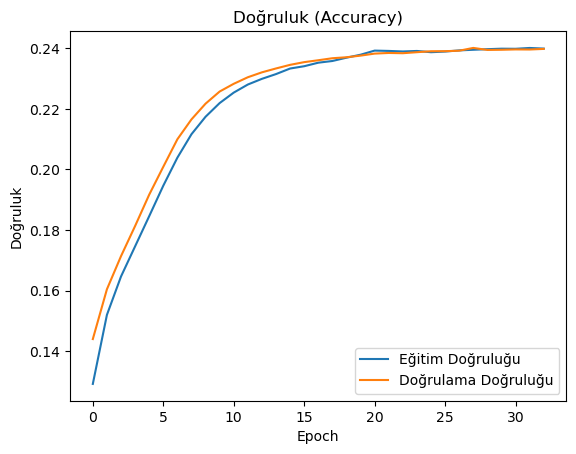

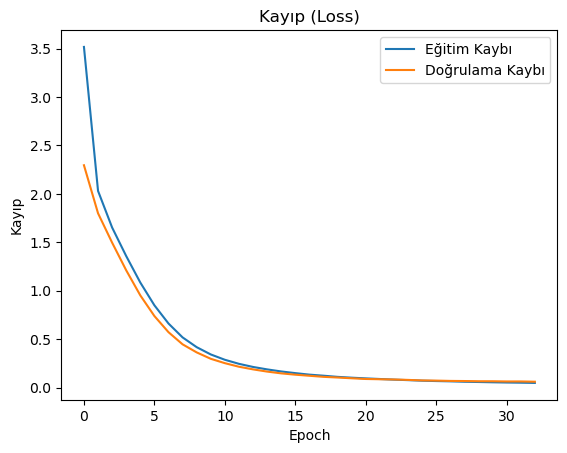

In [40]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk (Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Loss grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp (Loss)')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()

In [18]:

from tensorflow.keras.models import load_model
import pickle
import numpy as np

encoder_model = load_model("encoder_model.keras")
decoder_model = load_model("decoder_model.keras")

with open("tokenizer_input.pkl", "rb") as f:
    input_tokenizer = pickle.load(f)
with open("tokenizer_target.pkl", "rb") as f:
    target_tokenizer = pickle.load(f)

reverse_target_word_index = {i: word for word, i in target_tokenizer.word_index.items()}

max_encoder_len = encoder_model.input_shape[1] #20 de olabilir 
max_decoder_len = 100  

def temizle_input(text):
    import re
    text = str(text)
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

def predict_query(input_sentence):
    input_sentence = temizle_input(input_sentence)
    input_seq = input_tokenizer.texts_to_sequences([input_sentence])
    input_seq = pad_sequences(input_seq, maxlen=max_encoder_len, padding='post')
    
    states_value = encoder_model.predict(input_seq)

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_tokenizer.word_index['<start>']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = reverse_target_word_index.get(sampled_token_index, '')

        if sampled_word == '<end>' or len(decoded_sentence.split()) > max_decoder_len:
            stop_condition = True
        else:
            decoded_sentence += ' ' + sampled_word

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states_value = [h, c]

    return decoded_sentence.strip()


In [51]:
#ornek tahmin
input_sentence = "bana musteriler tablosundan ali veliyi getir"
predicted_query = predict_query(input_sentence)
print(f"Girdi: {input_sentence}")
print(f"Tahmin Edilen SQL Sorgusu: {predicted_query}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Girdi: bana musteriler tablosundan ali veliyi getir
Tahmin Edilen SQL Sorgusu: select * from products where status = false


In [20]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model ve tokenizer'ları yükle
model = load_model("nl2sql_seq2seq_model.keras")

with open("tokenizer_input.pkl", "rb") as f:
    input_tokenizer = pickle.load(f)
with open("tokenizer_target.pkl", "rb") as f:
    target_tokenizer = pickle.load(f)

reverse_target_word_index = {i: word for word, i in target_tokenizer.word_index.items()}

max_encoder_len = 20  
max_decoder_len = 100 

def temizle_input(text):
    import re
    text = str(text)
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

def predict_with_full_model(input_sentence):
    input_sentence = temizle_input(input_sentence)
    
    input_seq = input_tokenizer.texts_to_sequences([input_sentence])
    input_seq = pad_sequences(input_seq, maxlen=max_encoder_len, padding='post')

    # <start> token'ıyla decoder başlatma
    start_token_index = target_tokenizer.word_index['<start>']
    end_token_index = target_tokenizer.word_index['<end>']

    target_seq = np.zeros((1, max_decoder_len))
    target_seq[0, 0] = start_token_index

    decoded_tokens = []

    for i in range(1, max_decoder_len):
        output_tokens = model.predict([input_seq, target_seq], verbose=0)
        
        sampled_token_index = np.argmax(output_tokens[0, i - 1, :])
        if sampled_token_index == end_token_index:
            break
        sampled_word = reverse_target_word_index.get(sampled_token_index, '')
        decoded_tokens.append(sampled_word)
        target_seq[0, i] = sampled_token_index

    return ' '.join(decoded_tokens)

input_sentence = "bana calisanlar tablosundan butun calisan maaslarini getir ve her calisanin maasina 1000 ekle"
output_query = predict_with_full_model(input_sentence)
print(f"Girdi: {input_sentence}")
print(f"Tahmin Edilen SQL: {output_query}")

c:\Users\Anil1\.conda\envs\nlp\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 15 variables whereas the saved optimizer has 28 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Girdi: bana calisanlar tablosundan butun calisan maaslarini getir ve her calisanin maasina 1000 ekle
Tahmin Edilen SQL: select ödeme_no , phonenumber from dükkan where name = <value>


In [15]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

def compute_bleu(reference_texts, predicted_texts):
    smoothie = SmoothingFunction().method4
    scores = []
    for ref, pred in zip(reference_texts, predicted_texts):
        ref_tokens = ref.split()
        pred_tokens = pred.split()
        score = sentence_bleu([ref_tokens], pred_tokens, smoothing_function=smoothie)
        scores.append(score)
    return sum(scores) / len(scores)

def compute_rouge(reference_texts, predicted_texts):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
    rouge1_scores = []
    rougeL_scores = []
    for ref, pred in zip(reference_texts, predicted_texts):
        scores = scorer.score(ref, pred)
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)
    return {
        'rouge1': sum(rouge1_scores) / len(rouge1_scores),
        'rougeL': sum(rougeL_scores) / len(rougeL_scores),
    }


In [16]:
def decode_sequence(input_seq):
    states_value = encoder_model.predict(input_seq)
    target_seq = np.array([[target_tokenizer.word_index['<start>']]])
    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_word = target_tokenizer.index_word.get(sampled_token_index, '')

        if sampled_word == '<end>' or len(decoded_sentence.split()) > max_decoder_len:
            stop_condition = True
        else:
            decoded_sentence += ' ' + sampled_word

        target_seq = np.array([[sampled_token_index]])
        states_value = [h, c]

    return decoded_sentence.strip()



In [ ]:
reference_texts = []
predicted_texts = []

for i in range(100):  
    input_seq = X_val[i:i+1]
    decoded_sentence = decode_sequence(input_seq)

   
    target_seq = decoder_target_val[i].flatten()
    target_words = [target_tokenizer.index_word.get(int(idx), '') for idx in target_seq if int(idx) > 0]

    reference_sentence = ' '.join(target_words).split('<end>')[0].strip()

    reference_texts.append(reference_sentence)
    predicted_texts.append(decoded_sentence)


bleu_score = compute_bleu(reference_texts, predicted_texts)
rouge_scores = compute_rouge(reference_texts, predicted_texts)

print("BLEU Score:", bleu_score)
print("ROUGE-1 F1:", rouge_scores['rouge1'])
print("ROUGE-L F1:", rouge_scores['rougeL'])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━